# Make you own island using Shapely

## Preparation

Load the required modules.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point, LinearRing, Polygon, LineString
import string
%matplotlib inline

## The island

Create the island's border as a `LinearRing`.

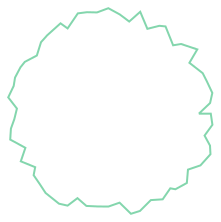

In [2]:
diameter = 100
deviation = 5
nr_points = 60
x_center = 0.0
y_center = 0.0
theta = np.linspace(0.0, 2.0*np.pi, nr_points)
x = x_center + np.random.normal(diameter, deviation, (len(theta), ))*np.cos(theta)
y = y_center + np.random.normal(diameter, deviation, (len(theta), ))*np.sin(theta)
country_border = LinearRing([t  for t  in zip(x, y)])
country_border

Reuse the code to create the lake border.

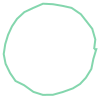

In [3]:
diameter = 20
deviation = 0.5
nr_points = 30
x_center = 30.0
y_center = 10.0
theta = np.linspace(0.0, 2.0*np.pi, nr_points)
x = x_center + np.random.normal(diameter, deviation, (len(theta), ))*np.cos(theta)
y = y_center + np.random.normal(diameter, deviation, (len(theta), ))*np.sin(theta)
lake_border = LinearRing([t  for t  in zip(x, y)])
lake_border

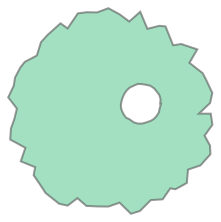

In [4]:
island = Polygon(country_border, [lake_border])
island

## Cities

Define a function to compute city names.

In [5]:
def choose_name():
    nr_char = random.randint(5, 10)
    city_name = ''
    for _ in range(nr_char):
        city_name += random.choice(string.ascii_lowercase)
    return city_name.capitalize()

Create cities, ensuring that they are withint the country borders, and not in the lake, assign name and  population to each.

In [6]:
bounds = island.bounds
cities = list()
nr_cities = 10
while len(cities) < nr_cities:
    x_pos = np.random.uniform(bounds[0], bounds[2])
    y_pos = np.random.uniform(bounds[1], bounds[3])
    city_point = Point((x_pos, y_pos))
    if island.contains(city_point):
        city_name = choose_name()
        city_pop = random.randint(5000, 50000)
        cities.append({'name': city_name, 'position': city_point, 'population': city_pop})

## Roads

Create roads between cities, but only when they can be straight lines, and run on land.

In [7]:
roads = []
for i, city1 in enumerate(cities):
    for city2 in cities[i + 1:]:
        road = LineString([city1['position'], city2['position']])
        if island.contains(road):
            roads.append(road)

In [8]:
len(roads)

38

## Plot the island

Define a function to plot the country, its cities and roads.

In [9]:
def plot_island(island, cities, roads):
    plt.axes().set_facecolor('lightblue')
    x_island, y_island = island.boundary[0].xy
    plt.axes().fill(x_island, y_island, color='lightgreen')
    for lake_border in island.boundary[1:]:
        x_lake, y_lake = lake_border.xy
        plt.axes().fill(x_lake, y_lake, color='lightblue', linewidth=0.7, alpha=1.0)
    for city in cities:
        plt.plot(*city['position'].xy, marker='o', markersize=3, color='red')
    for road in roads:
        plt.plot(road.xy[0], road.xy[1], color='black', linewidth=0.4)
    plt.axes().set_aspect('equal')

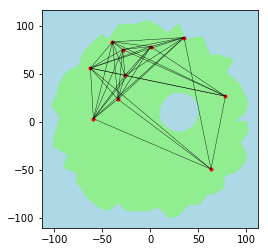

In [11]:
plot_island(island, cities, roads)